### Load Data and Initial Exploration (California Housing Dataset)

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_cali = pd.read_csv('dataset/housing.csv')
print("California Housing dataset loaded successfully.")

California Housing dataset loaded successfully.


In [49]:
# Display the first few rows of the dataframe
print("\nFirst 5 rows of the dataset:")
print(df_cali.head())


First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [50]:
# Get a concise summary of the dataframe
print("\nDataset Information:")
df_cali.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
# Get descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df_cali.describe())


Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.49990

In [52]:
# Check for missing values
print("\nMissing values in each column:")
print(df_cali.isnull().sum())


Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### Data Visualization 

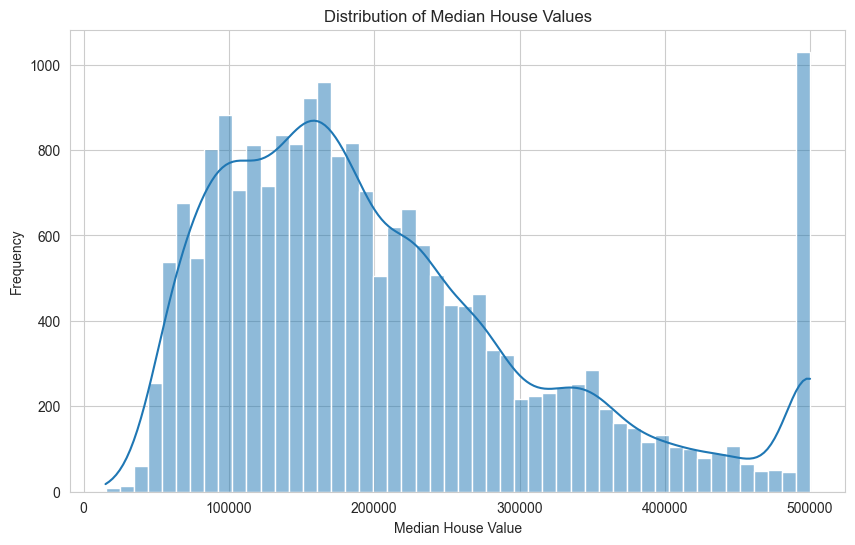

In [53]:
# Set a style for seaborn plots
sns.set_style("whitegrid")

# 1. Distribution of the target variable 'median_house_value'
plt.figure(figsize=(10, 6))
sns.histplot(df_cali['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

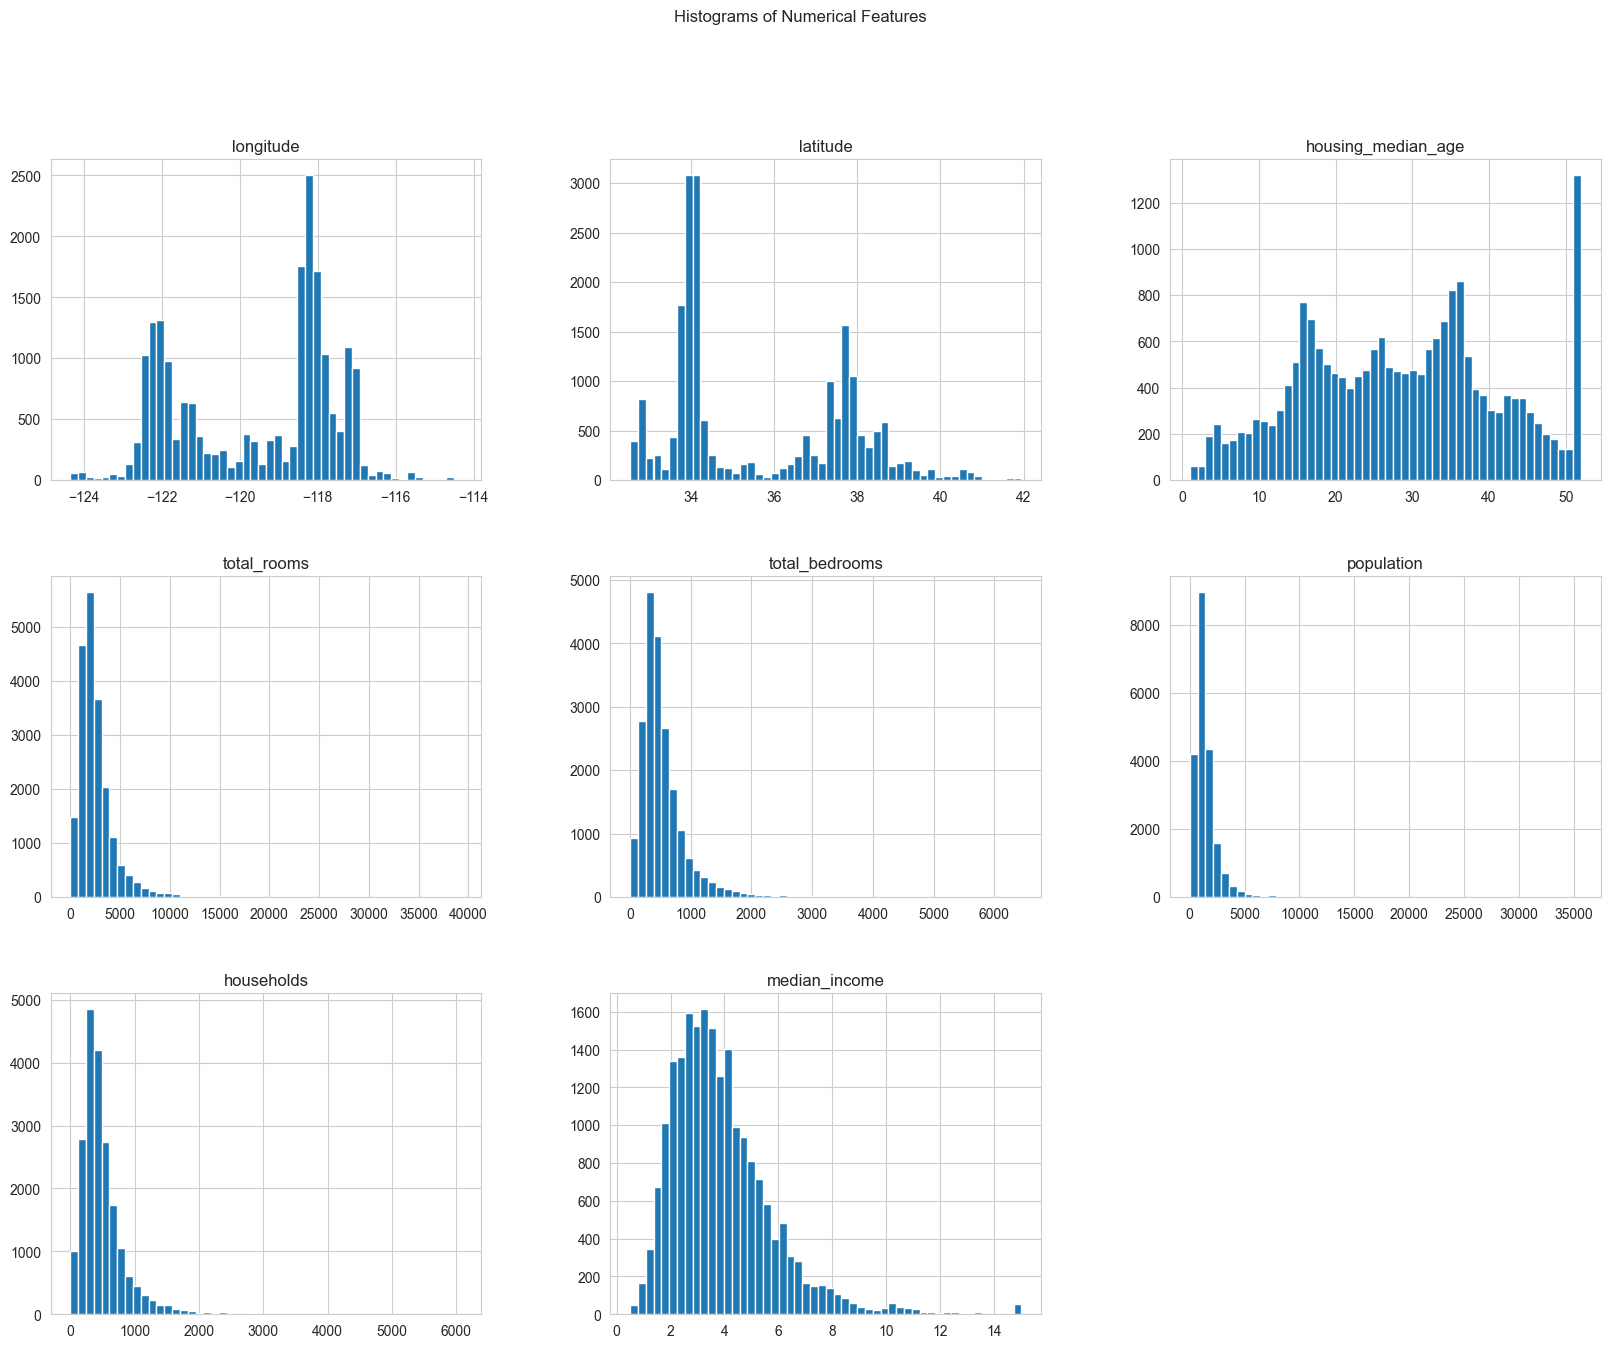

In [54]:
# 2. Histograms for other key numerical features
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                      'total_bedrooms', 'population', 'households', 'median_income']
df_cali[numerical_features].hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

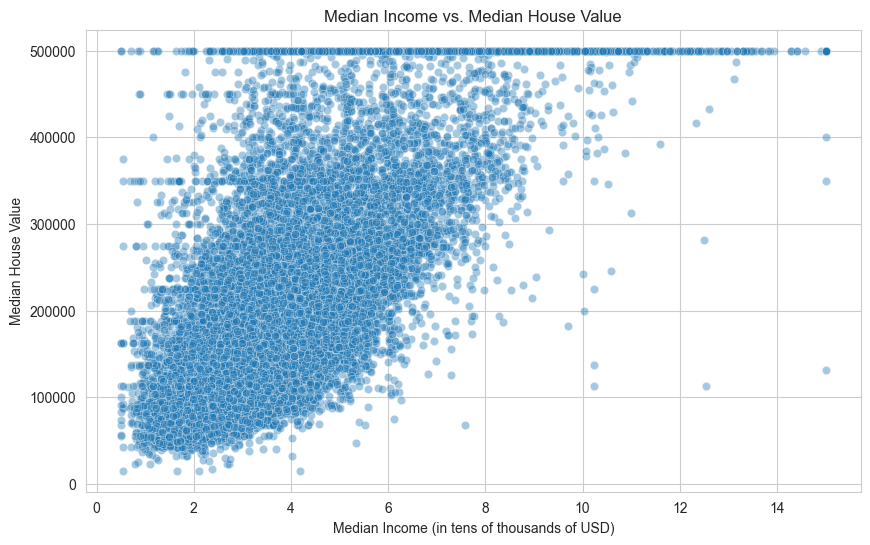

In [55]:
# 3. Scatter plot: median_income vs. median_house_value (a very important relationship)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cali['median_income'], y=df_cali['median_house_value'], alpha=0.4)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income (in tens of thousands of USD)')
plt.ylabel('Median House Value')
plt.show()

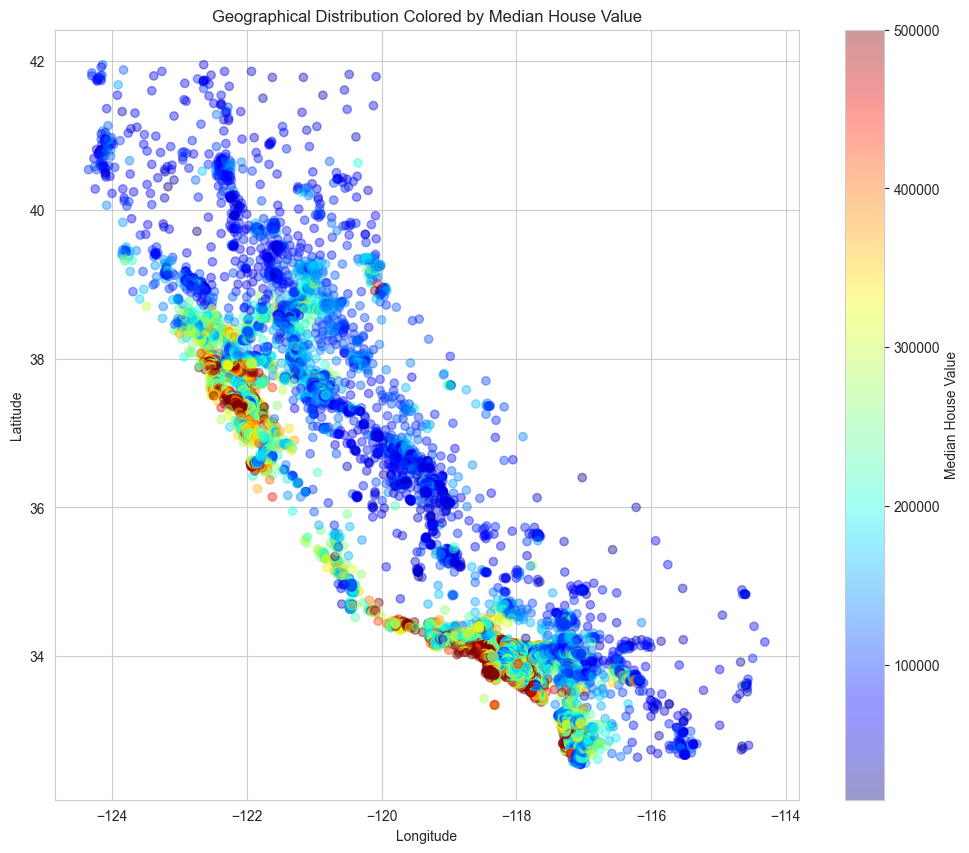

In [57]:
# Simpler geographical plot colored by house value
plt.figure(figsize=(12, 10))
plt.scatter(df_cali["longitude"], df_cali["latitude"], alpha=0.4,
            c=df_cali["median_house_value"], cmap=plt.get_cmap("jet")) # 'jet' is a common colormap
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution Colored by Median House Value")
plt.show()

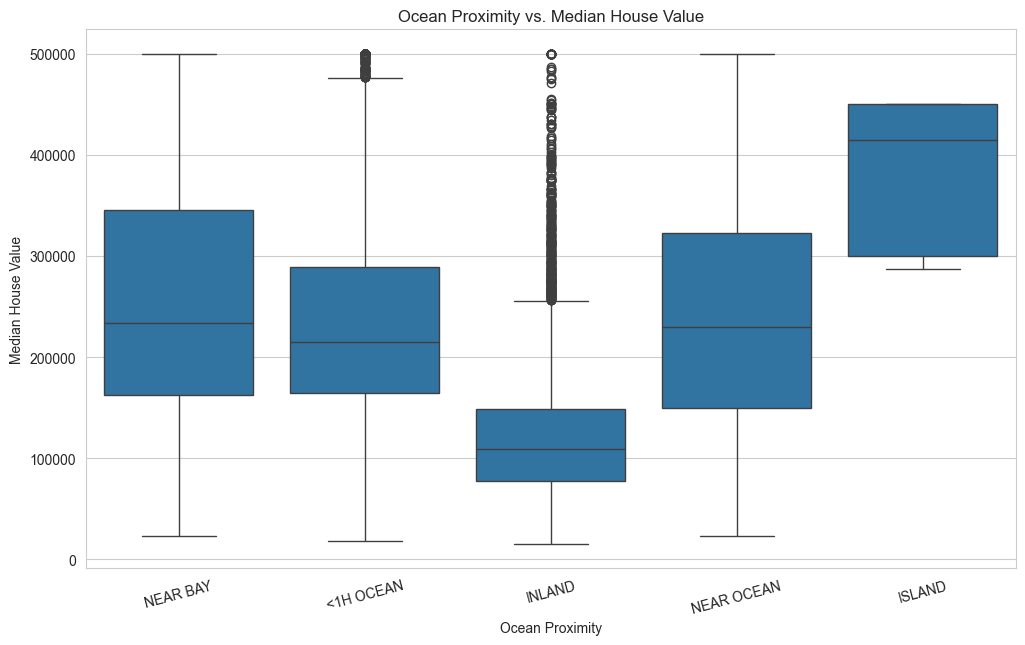

In [58]:
# 5. Box plot for the categorical feature 'ocean_proximity' vs. 'median_house_value'
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_cali['ocean_proximity'], y=df_cali['median_house_value'])
plt.title('Ocean Proximity vs. Median House Value')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=15) # Rotate labels if they overlap
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4664\2991793003.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr['total_bedrooms'].fillna(df_corr['total_bedrooms'].median(), inplace=True)


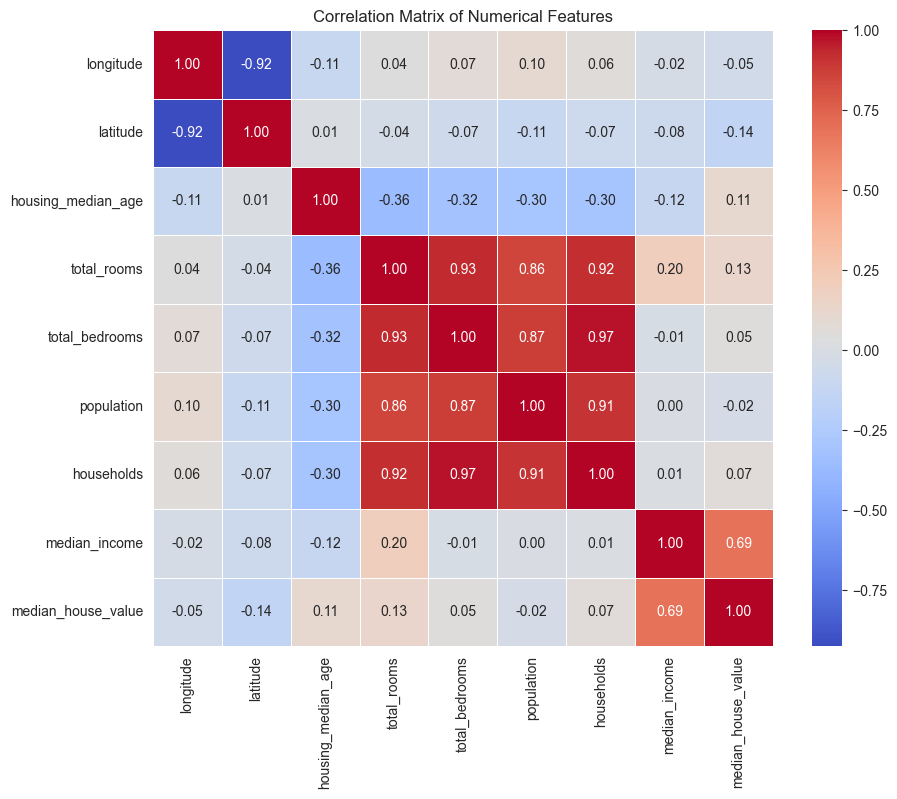

In [59]:
# 6. Correlation heatmap for numerical features
# First, create a copy for correlation calculation, as we might fill NA for 'total_bedrooms' differently later
df_corr = df_cali.drop(columns=['ocean_proximity']).copy() # Drop non-numeric before .corr()

# For the heatmap, we can temporarily fill NA in total_bedrooms with the median for visualization purposes,
# but we'll handle it more formally in preprocessing.
df_corr['total_bedrooms'].fillna(df_corr['total_bedrooms'].median(), inplace=True)

correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [60]:

# Specifically, let's look at correlations with 'median_house_value'
print("\nCorrelation with Median House Value:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))


Correlation with Median House Value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### Data Preprocessing

In [62]:
# Make a copy of the DataFrame to work on preprocessing
df_processed_cali = df_cali.copy()

# 1. Handle Missing Values in 'total_bedrooms'
# We'll use median imputation. The median is generally robust to outliers.
median_total_bedrooms = df_processed_cali['total_bedrooms'].median()
df_processed_cali['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print(f"Median of 'total_bedrooms' used for imputation: {median_total_bedrooms}")
print(f"Missing values in 'total_bedrooms' after imputation: {df_processed_cali['total_bedrooms'].isnull().sum()}")

Median of 'total_bedrooms' used for imputation: 435.0
Missing values in 'total_bedrooms' after imputation: 0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4664\2427064128.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed_cali['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


In [63]:
# 2. Feature Engineering (Creating new, potentially more useful features)
# These are common features created for this dataset.
df_processed_cali['rooms_per_household'] = df_processed_cali['total_rooms'] / df_processed_cali['households']
df_processed_cali['bedrooms_per_room'] = df_processed_cali['total_bedrooms'] / df_processed_cali['total_rooms']
df_processed_cali['population_per_household'] = df_processed_cali['population'] / df_processed_cali['households']


print("\nFirst 5 rows after feature engineering:")
print(df_processed_cali.head())


First 5 rows after feature engineering:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   rooms_per_household  bed

In [64]:
# 3. Encode Categorical Feature: 'ocean_proximity'
# We'll use One-Hot Encoding.
# First, let's see the unique categories
print(f"\nUnique values in 'ocean_proximity': {df_processed_cali['ocean_proximity'].unique()}")

df_processed_cali = pd.get_dummies(df_processed_cali, columns=['ocean_proximity'], drop_first=True)
# drop_first=True helps avoid multicollinearity.

print("\nFirst 5 rows after One-Hot Encoding 'ocean_proximity':")
print(df_processed_cali.head())


Unique values in 'ocean_proximity': ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

First 5 rows after One-Hot Encoding 'ocean_proximity':
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_ho

In [82]:
# 4. Feature Scaling (Numerical Features)
# We will separate the target variable before scaling.
# Scaling is important because features are on different scales.
# We'll use StandardScaler, which standardizes features by removing the mean and scaling to unit variance.

from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the target and already OHE columns)
# Target variable
y_cali = df_processed_cali['median_house_value']
# Features (everything else)
X_cali_unscaled = df_processed_cali.drop('median_house_value', axis=1)

# Get list of numerical column names from X_cali_unscaled (those that are not boolean from OHE)
numerical_cols_to_scale = X_cali_unscaled.select_dtypes(include=np.number).columns.tolist()

# We will scale only the columns that are definitely numerical
cols_definitely_numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                             'total_bedrooms', 'population', 'households', 'median_income',
                             'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Filter these from the actual columns present in X_cali_unscaled, in case some were dropped
cols_to_scale_final = [col for col in cols_definitely_numerical if col in X_cali_unscaled.columns]


scaler = StandardScaler()

# Create a new DataFrame for scaled features
X_cali_scaled = X_cali_unscaled.copy()
X_cali_scaled[cols_to_scale_final] = scaler.fit_transform(X_cali_unscaled[cols_to_scale_final])

In [83]:
import joblib
import os

scaler_filename_cali = 'california_housing_scaler.joblib'
model_dir = 'saved_models' # Make sure this directory path is correct
os.makedirs(model_dir, exist_ok=True)
full_scaler_path_cali = os.path.join(model_dir, scaler_filename_cali)

# Ensure 'scaler' is the variable name of your FITTED StandardScaler
joblib.dump(scaler, full_scaler_path_cali)
print(f"\nCalifornia Housing StandardScaler saved successfully as '{full_scaler_path_cali}'")


California Housing StandardScaler saved successfully as 'saved_models\california_housing_scaler.joblib'


In [84]:
print("\nFirst 5 rows of X (features) after scaling:")
print(X_cali_scaled.head())

print("\nTarget variable y (median_house_value) - first 5 values:")
print(y_cali.head())

print("\nInfo for scaled features X:")
X_cali_scaled.info()


First 5 rows of X (features) after scaling:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  rooms_per_household  \
0   -0.974429   -0.977033       2.344766             0.628559   
1    0.861439    1.669961       2.332238             0.327041   
2   -0.820777   -0.843637       1.782699             1.155620   
3   -0.766028   -0.733781       0.932968             0.156966   
4   -0.759847   -0.629157      -0.012881             0.344711   

   bedrooms_per_room  population_per_household  ocean_proximity_INLAND  \
0          -1.029988                 -0

### Splitting Data 

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# X_cali_scaled is our preprocessed features
# y_cali is our target variable

X_train_cali, X_test_cali, y_train_cali, y_test_cali = train_test_split(
    X_cali_scaled, y_cali, test_size=0.2, random_state=42
)

print("Shape of X_train_cali:", X_train_cali.shape)
print("Shape of X_test_cali:", X_test_cali.shape)
print("Shape of y_train_cali:", y_train_cali.shape)
print("Shape of y_test_cali:", y_test_cali.shape)

Shape of X_train_cali: (16512, 15)
Shape of X_test_cali: (4128, 15)
Shape of y_train_cali: (16512,)
Shape of y_test_cali: (4128,)


### Model Selection and Training

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Ensure numpy is imported for np.sqrt

In [88]:
# --- Model 1: Linear Regression ---
print("\n--- Training Linear Regression ---")
lr_model_cali = LinearRegression()
lr_model_cali.fit(X_train_cali, y_train_cali)
print("Linear Regression training complete.")
y_pred_lr_cali = lr_model_cali.predict(X_test_cali)


--- Training Linear Regression ---
Linear Regression training complete.


In [89]:
# --- Model 2: Random Forest Regressor ---
print("\n--- Training Random Forest Regressor ---")
# Using 100 estimators as a good starting point
rf_model_cali = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_cali.fit(X_train_cali, y_train_cali)
print("Random Forest Regressor training complete.")
y_pred_rf_cali = rf_model_cali.predict(X_test_cali)


--- Training Random Forest Regressor ---


Random Forest Regressor training complete.


### Model Evaluation

In [90]:
print("\n--- Linear Regression Evaluation (California) ---")
mae_lr_cali = mean_absolute_error(y_test_cali, y_pred_lr_cali)
mse_lr_cali = mean_squared_error(y_test_cali, y_pred_lr_cali)
rmse_lr_cali = np.sqrt(mse_lr_cali)
r2_lr_cali = r2_score(y_test_cali, y_pred_lr_cali)

print(f"  MAE:  {mae_lr_cali:.2f}")
print(f"  MSE:  {mse_lr_cali:.2f}")
print(f"  RMSE: {rmse_lr_cali:.2f}")
print(f"  R²:   {r2_lr_cali:.4f}")



--- Linear Regression Evaluation (California) ---
  MAE:  50888.66
  MSE:  5280716470.09
  RMSE: 72668.54
  R²:   0.5970


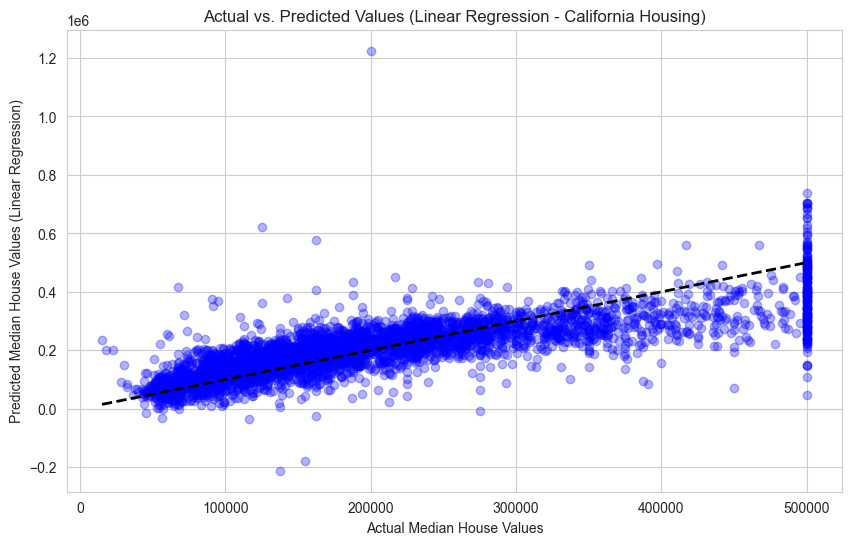

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cali, y_pred_lr_cali, alpha=0.3, color='blue') # Using blue for Linear Regression
plt.plot([y_test_cali.min(), y_test_cali.max()], [y_test_cali.min(), y_test_cali.max()], '--k', lw=2) # Diagonal line
plt.xlabel('Actual Median House Values')
plt.ylabel('Predicted Median House Values (Linear Regression)')
plt.title('Actual vs. Predicted Values (Linear Regression - California Housing)')
plt.show()

In [92]:
print("\n--- Random Forest Regressor Evaluation (California) ---")
mae_rf_cali = mean_absolute_error(y_test_cali, y_pred_rf_cali)
mse_rf_cali = mean_squared_error(y_test_cali, y_pred_rf_cali)
rmse_rf_cali = np.sqrt(mse_rf_cali)
r2_rf_cali = r2_score(y_test_cali, y_pred_rf_cali)

print(f"  MAE:  {mae_rf_cali:.2f}")
print(f"  MSE:  {mse_rf_cali:.2f}")
print(f"  RMSE: {rmse_rf_cali:.2f}")
print(f"  R²:   {r2_rf_cali:.4f}")


--- Random Forest Regressor Evaluation (California) ---
  MAE:  32331.15
  MSE:  2534885444.42
  RMSE: 50347.65
  R²:   0.8066


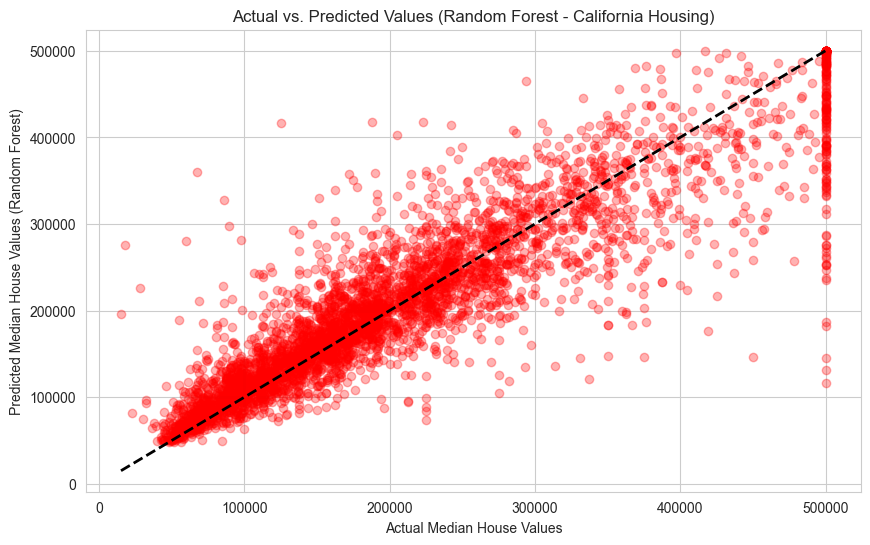

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cali, y_pred_rf_cali, alpha=0.3, color='red')
plt.plot([y_test_cali.min(), y_test_cali.max()], [y_test_cali.min(), y_test_cali.max()], '--k', lw=2) # Diagonal line
plt.xlabel('Actual Median House Values')
plt.ylabel('Predicted Median House Values (Random Forest)')
plt.title('Actual vs. Predicted Values (Random Forest - California Housing)')
plt.show()

### Saving the trained model

In [94]:
import joblib
import os

# --- Step 1.7: Saving the Trained Model (California Housing) ---

# We'll save the Random Forest model as it performed best
model_to_save_cali = rf_model_cali # This is the RandomForestRegressor instance
model_filename_cali = 'california_housing_model_rf.joblib'

# Re-use or define the model directory
model_dir = 'saved_models' # This should already exist from our previous attempt
os.makedirs(model_dir, exist_ok=True)

full_model_path_cali = os.path.join(model_dir, model_filename_cali)

# Save the model
joblib.dump(model_to_save_cali, full_model_path_cali)
print(f"\nCalifornia Housing RF Model saved successfully as '{full_model_path_cali}'")

# Save the list of feature columns (from X_cali_scaled)
# This ensures we use the same features in the same order in Django
feature_columns_cali = X_cali_scaled.columns.tolist()
columns_filename_cali = os.path.join(model_dir, 'california_model_feature_columns.joblib')
joblib.dump(feature_columns_cali, columns_filename_cali)
print(f"California feature columns saved successfully as '{columns_filename_cali}'")
print(f"Features the California model was trained on: {feature_columns_cali}")


California Housing RF Model saved successfully as 'saved_models\california_housing_model_rf.joblib'
California feature columns saved successfully as 'saved_models\california_model_feature_columns.joblib'
Features the California model was trained on: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
